## Step 1: Train/Test Split

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [12]:
import sys, os
sys.path.append(os.path.abspath("../src"))

from data_preprocessing import load_and_engineer

# Load engineered dataset
df = load_and_engineer()

# Now you can do train/test split + model training
target = "NO2(GT)"
X = df.drop(columns=[target, "NO2_status"], errors="ignore")
y = df[target]


In [9]:
target = "NO2(GT)"  # pollutant we want to predict

# Drop non-numeric or status columns if they exist
X = df.drop(columns=[target, "NO2_status"], errors="ignore")
y = df[target]

# Chronological split (70% train, 30% test)
split_idx = int(len(df) * 0.7)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

# -------------------------------
# Step 4: Train XGBoost Model
# -------------------------------
model = xgb.XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)

# -------------------------------
# Step 5: Evaluate Model
# -------------------------------
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# Baseline: predict previous value
y_naive = y_test.shift(1).bfill()
mae_naive = mean_absolute_error(y_test, y_naive)
rmse_naive = np.sqrt(mean_squared_error(y_test, y_naive))

print(f"Baseline MAE: {mae_naive:.2f}")
print(f"Baseline RMSE: {rmse_naive:.2f}")


Train shape: (562, 30)
Test shape: (241, 30)
MAE: 6.42
RMSE: 8.32
Baseline MAE: 13.00
Baseline RMSE: 16.79


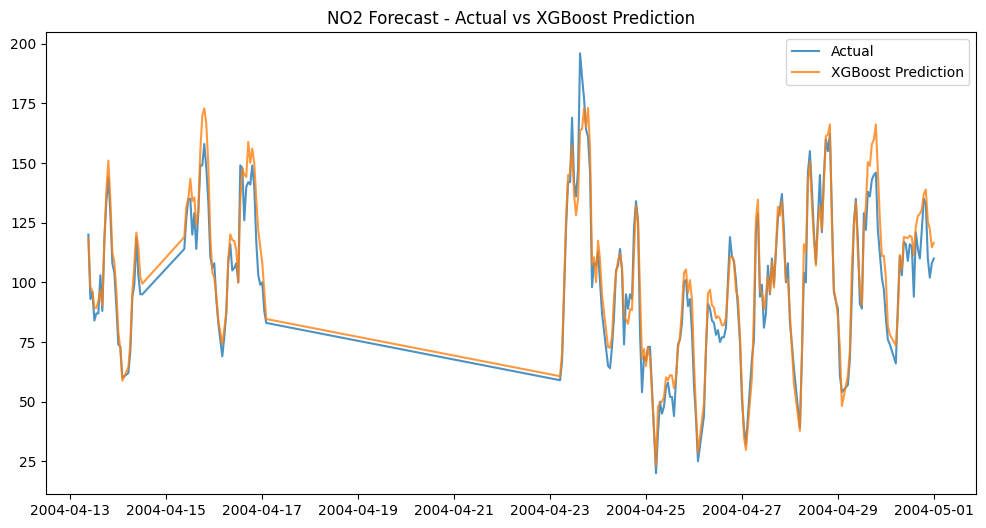

In [10]:
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label="Actual", alpha=0.8)
plt.plot(y_test.index, y_pred, label="XGBoost Prediction", alpha=0.8)
plt.legend()
plt.title("NO2 Forecast - Actual vs XGBoost Prediction")
plt.savefig("../results/plots/xgboost_no2_forecast.png", dpi=300)
plt.show()


In [13]:
import pandas as pd

preds_xgb = pd.DataFrame({
    "y_test": y_test,
    "y_pred_xgb": y_pred
})
preds_xgb.to_csv("../results/xgboost_predictions.csv")


In [14]:
import joblib

# Save trained XGBoost model
joblib.dump(model, "../models/xgboost_no2_model.pkl")
print("Model saved to ../models/xgboost_no2_model.pkl")


Model saved to ../models/xgboost_no2_model.pkl
